### Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Preview data
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Cleaning

In [6]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [11]:
# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

### Exploratory Analysis

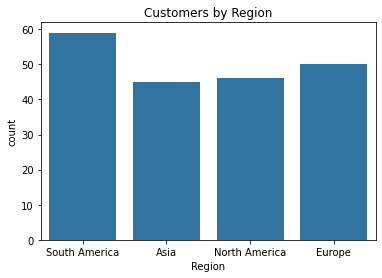

In [12]:
# Univariate analysis
sns.countplot(x='Region', data=customers)
plt.title('Customers by Region')
plt.show()

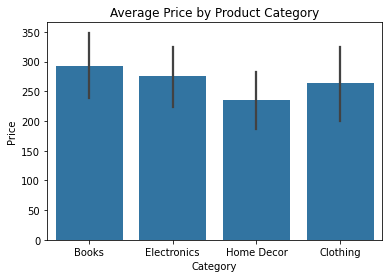

In [13]:
sns.barplot(x='Category', y='Price', data=products)
plt.title('Average Price by Product Category')
plt.show()

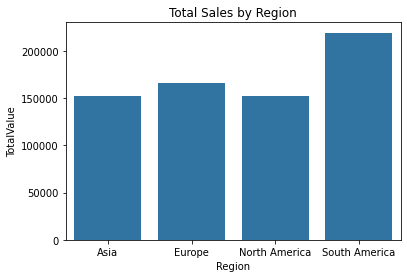

In [14]:
# Bivariate analysis
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Sales by Region')
plt.show()

In [15]:
# Total revenue per category
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()
print(category_revenue.sort_values(by='TotalValue', ascending=False))


      Category  TotalValue
0        Books   192147.47
2  Electronics   180783.50
1     Clothing   166170.66
3   Home Decor   150893.93


In [16]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [17]:
data['Price_x'].equals(data['Price_y'])

True

In [18]:
data.drop(columns = ['Price_y'], inplace = True)

In [19]:
data.rename(columns = {'Price_x': 'Price'}, inplace = True)

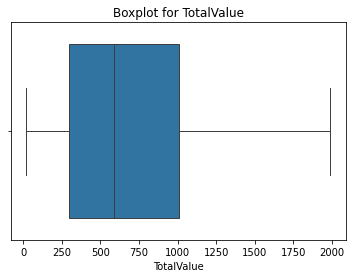

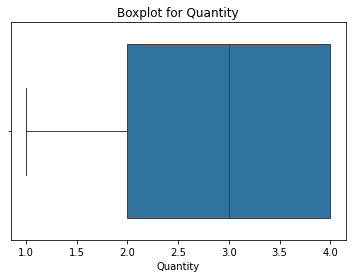

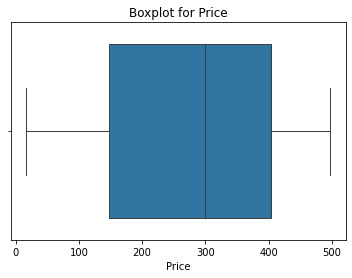

In [20]:
# Check outliers in numerical columns
numerical_cols = ['TotalValue', 'Quantity', 'Price'] 
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [21]:
# Calculate skewness for numerical columns
skewness = transactions[['TotalValue', 'Price', 'Quantity']].skew()
print("Skewness:")
print(skewness)

Skewness:
TotalValue    0.644948
Price        -0.227039
Quantity     -0.045507
dtype: float64


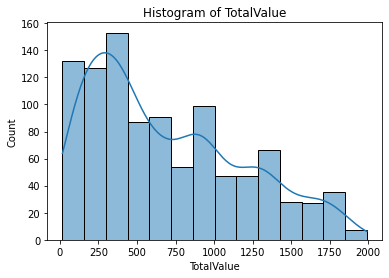

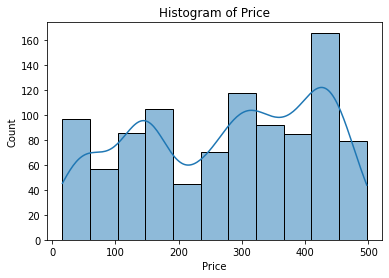

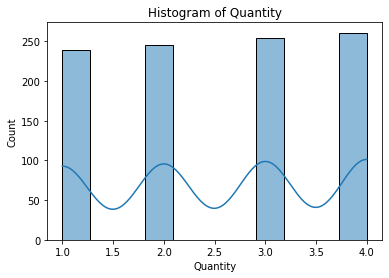

In [22]:
for column in ['TotalValue', 'Price', 'Quantity']:
    sns.histplot(transactions[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [23]:
import numpy as np
data['TotalValue'] = np.log1p(data['TotalValue'])  # log(1 + x) handles zeros

In [24]:
print("Skewness after log transformation:", data['TotalValue'].skew())

Skewness after log transformation: -0.7471881750208736


In [25]:
data.to_csv('data.csv', index = False)

<AxesSubplot:>

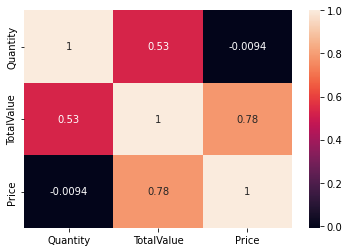

In [26]:
sns.heatmap(data.corr(numeric_only = True), annot = True)